In [ ]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path

# Individual models

In [ ]:
files = ["indiv_m1_final-Schirrmeister2017-alignment-exp_4-0-both_results.csv","indiv_m1_final-Schirrmeister2017-no-alignment-exp_4-0-both_results.csv",
         "indiv_m2_final-Schirrmeister2017-alignment-exp_4-0-both_results.csv", "indiv_m2_final-Schirrmeister2017-no-alignment-exp_4-0-both_results.csv",
         "indiv_m3_final-Schirrmeister2017-alignment-exp_4-0-both_results.csv", "indiv_m3_final-Schirrmeister2017-no-alignment-exp_4-0-both_results.csv",
         "indiv_m1_final-BNCI2014001-alignment-exp_4-0-both_results.csv","indiv_m1_final-BNCI2014001-no-alignment-exp_4-0-both_results.csv",
         "indiv_m2_final-BNCI2014001-alignment-exp_4-0-both_results.csv","indiv_m2_final-BNCI2014001-no-alignment-exp_4-0-both_results.csv",
         "indiv_m3_final-BNCI2014001-alignment-exp_4-0-both_results.csv","indiv_m3_final-BNCI2014001-no-alignment-exp_4-0-both_results.csv",]
df_merge = pd.concat([pd.read_csv(file) for file in files])

In [ ]:
df_merge = df_merge.loc[df_merge["session"] != 'both' ]
df_merge = df_merge.reset_index(drop=True)

df_exp2 = df_merge

df_exp2['EA'] = [output[-1] for output in df_exp2['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]
df_exp2['model'] = [output[0] for output in df_exp2['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]

df_exp2['score'] = df_exp2['score']*100
df_exp2 = df_exp2[df_exp2["exp"] != "zero_shot"].reset_index(drop=True)

df_exp2['EA'] = pd.Categorical(df_exp2['EA'],
             categories=['WithoutEA', 'EA'],
             ordered=True,)
#
df_exp2 = df_exp2.sort_values(
    ["dataset", 'model', 'EA'], ascending=True
)

# For each subj
df_exp2["aux"] = df_exp2['exp'].astype(str) +"-"+ df_exp2["EA"].astype(str)

# Renaming
df_exp2.loc[df_exp2['dataset']=='001-2014', 'dataset'] = 'BNCI2014'
df_exp2.loc[df_exp2['model']=='Deep4Net', 'model'] = 'DeepNet'
df_exp2.loc[df_exp2['model']=='ShallowFBCSPNet', 'model'] = 'ShallowNet'
df_exp2.loc[df_exp2['model']=='EEGNetv4', 'model'] = 'EEGNet'

In [ ]:
FONTSIZE = 8 * 0.7

# A4 width: 6.3 inches 2*1.25 margins --> 5.8 figures
W = 5.8 * 1.75

plt.rcParams["figure.figsize"] = (W*0.7, 0.5*W / 3.7)
plt.rcParams["axes.grid"] = False
fontsize = FONTSIZE * 2
lw = 1.3
plt.rcParams.update({
    'font.size': fontsize,
    'legend.fontsize': 'x-small',
    'axes.labelsize': 'small',
    'xtick.labelsize': 'xx-small',
    'ytick.labelsize': 'small',
    'axes.titlesize': 'medium',
    'lines.linewidth': lw,
})

In [ ]:
#SOURCE

def source(df,ax):

    #fig, ax = plt.subplots()
    palette_colours = ['#C25251', '#447C55'] #'#458A80', , '#4DAB9E' ,  '#FF8685', '#51C273'
    sns.set_style("whitegrid")
    ax = sns.boxplot(data=df, y="score", x="subject", hue=df[["EA"]].apply(tuple, axis=1),
                    orient='v',
                    ax=ax, palette=palette_colours)
    plt.legend([],[], frameon=False)
    ax.get_legend().set_visible(False)

    #ax = sns.stripplot(data=df, y="score", x="subject",
    #                hue=df[["EA"]].apply(tuple, axis=1), ax=ax,dodge=True,
    #                linewidth=1, alpha=.5, legend = False, palette=palette_colours)

    plt.legend([],[], frameon=False)

    ax.set_facecolor("white")

    ax.set_xlabel("")
    ax.set_ylabel("Accuracy (%)", fontsize=fontsize/1.3)
    ax.set_ylim(35, 100)
    plt.yticks(fontsize=fontsize/1.5)

    """ax.set_facecolor("white")

    ax.set_xlabel("")
    ax.set_ylabel("Accuracy (%)", fontsize=fontsize/1.3)
    ax.set_ylim(35, 100)
    plt.yticks(fontsize=fontsize/1.5)

    plt.legend([],[], frameon=False)

    #plt.tight_layout()
    new_labels= ["No-EA","EA"] #,"ShallowNet", "ShallowNet-EA"

    handles, previous_labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles=handles, labels=new_labels, loc='lower center', bbox_to_anchor=(0.5, -0.3),
                      fancybox=False, shadow=False, ncol=3, fontsize=fontsize/1.6)

    frame = legend.get_frame()
    frame.set_facecolor('white')"""
    #fig.savefig(f"source_{m}_{d}.pdf", format='pdf', dpi=300, bbox_inches='tight')


#TARGET

def target(df,ax):

    palette_colours = ['#C25251', '#447C55'] #'#458A80', , '#4DAB9E' ,  '#FF8685', '#51C273'
    sns.set_style("whitegrid")
    ax = sns.boxplot(data=df, y="score", x="test", hue=df[["EA"]].apply(tuple, axis=1),
                    orient='v',
                    ax=ax, palette=palette_colours)

    ax.set(yticklabels=[])

    for patch in ax.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .8))

    #ax = sns.stripplot(data=df, y="score", x="subject",
    #                hue=df[["EA"]].apply(tuple, axis=1), ax=ax,dodge=True,
    #                linewidth=1, alpha=.5, legend = False, palette=palette_colours)

    #fig.savefig(f"target_{m}_{d}.pdf", format='pdf', dpi=300, bbox_inches='tight')




Overall - Indivdual
   No EA
58.35961322223971
   EA
62.375853792736315
   FT No EA
60.5159757780999
   FT EA
62.57461011363131
EEGNet
   No EA
58.940269756325726
   EA
62.466234804338626
   FT No EA
62.60770887010673
   FT EA
63.16343161775885

ShallowNet
   No EA
58.70858427614758
   EA
63.61285499651732
   FT No EA
59.99821323113609
   FT EA
62.87687654148051

DeepNet
   No EA
57.42998563424582
   EA
61.048471577353006
   FT No EA
58.942005233056875
   FT EA
61.68352218165455

BNCI2014
   No EA
58.445216049382715
   EA
60.42824074074074
   FT No EA
58.942005233056875
   FT EA
61.68352218165455


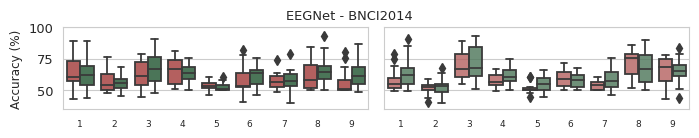

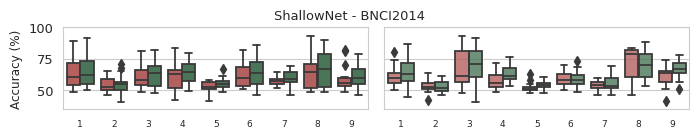

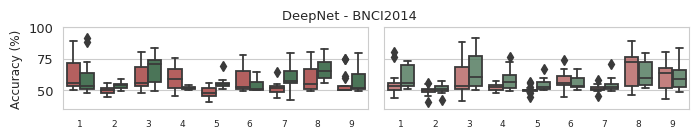

Schirrmeister2017
   No EA
58.29188351285184
   EA
63.9168223613482
   FT No EA
58.942005233056875
   FT EA
61.68352218165455


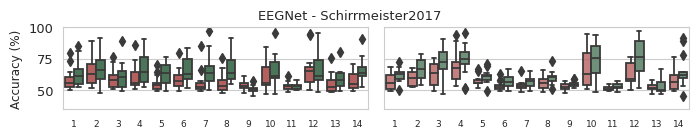

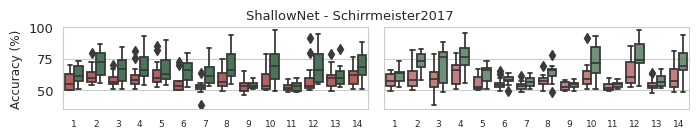

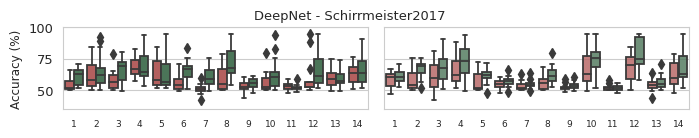

In [ ]:
models = {'EEGNet':'m1', 'ShallowNet':'m2','DeepNet':'m3'}
dataset = {'BNCI2014':'d1', 'Schirrmeister2017':'d2'}

print('Overall - Indivdual')
print('   No EA')
print(df_exp2[df_exp2['aux'] == "indiv-WithoutEA"]['score'].mean())
print('   EA')
print(df_exp2[df_exp2['aux'] == "indiv-EA"]['score'].mean())
print('   FT No EA')
print(df_exp2[df_exp2['aux'] == "indiv_ft-WithoutEA"]['score'].mean())
print('   FT EA')
print(df_exp2[df_exp2['aux'] == "indiv_ft-EA"]['score'].mean())

for model in models:

  df_model = df_exp2[df_exp2['model']==model]

  print(model)
  print('   No EA')
  print(df_model[df_model['aux'] == "indiv-WithoutEA"]['score'].mean())
  print('   EA')
  print(df_model[df_model['aux'] == "indiv-EA"]['score'].mean())
  print('   FT No EA')
  print(df_model[df_model['aux'] == "indiv_ft-WithoutEA"]['score'].mean())
  print('   FT EA')
  print(df_model[df_model['aux'] == "indiv_ft-EA"]['score'].mean())


  print()


for data in dataset:


  df_exp2_data = df_exp2[df_exp2['dataset']==data]
  d = dataset[data]

  print(data)
  print('   No EA')
  print(df_exp2_data[df_exp2_data['aux'] == "indiv-WithoutEA"]['score'].mean())
  print('   EA')
  print(df_exp2_data[df_exp2_data['aux'] == "indiv-EA"]['score'].mean())
  print('   FT No EA')
  print(df_model[df_model['aux'] == "indiv_ft-WithoutEA"]['score'].mean())
  print('   FT EA')
  print(df_model[df_model['aux'] == "indiv_ft-EA"]['score'].mean())

  for model in models:

    df_exp_indiv = df_exp2_data[df_exp2_data['exp'] == 'indiv']
    df_exp_indiv = df_exp_indiv.reset_index(drop=True)

    df_exp2_model = df_exp_indiv[df_exp_indiv['model']==model]
    m = models[model]

    fig, ax = plt.subplots(1,2)
    plt.suptitle(f"{model} - {data}", fontsize=fontsize/1.2)
    source(df_exp2_model, ax[0])
    target(df_exp2_model, ax[1])


    plt.legend([],[], frameon=False)

    ax[1].set_facecolor("white")

    ax[1].set_xlabel("")
    ax[1].set_ylabel("")
    ax[1].set_ylim(35, 100)
    plt.yticks(fontsize=fontsize/1.5)

    plt.legend([],[], frameon=False)

    #plt.tight_layout()

    fig.tight_layout(pad=1.0)

    fig.subplots_adjust(top=0.85)

    fig.savefig(f"source_target_{m}_{d}.pdf", format='pdf', dpi=300, bbox_inches='tight')
    plt.show()



# Ensemble

In [ ]:
def plt_ensemble_legend(df_merge, m, ax, i, data):

    ax = ax[i]
    ax.set_title(data)

    #fig, ax = plt.subplots()
    palette_colours = ['#447C55', '#C25251' ,'#26803F', '#EB6E79', '#007F51', '#CA4486', '#507FA1'] # ,'#458A80', '#4DAB9E',  '#FF8685', '#51C273'
    sns.set_style("whitegrid")
    ax = sns.boxplot(data=df_merge, y="score", x="model", hue=df_merge[["EA", "exp"]].apply(tuple, axis=1),
                    orient='v',
                    ax=ax, palette=palette_colours)

    if i == 1 :
      ax.set(yticklabels=[])

    ax.legend([],[], frameon=False)
    ax.set_facecolor("white")

    for patch in ax.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .8))

    ax = sns.stripplot(data=df_merge, y="score", x="model",
                    hue=df_merge[["EA","exp"]].apply(tuple, axis=1), ax=ax,dodge=True,
                    linewidth=1, alpha=.5, legend = False, palette=palette_colours)

    ax.legend([],[], frameon=False)

    ax.set_facecolor("white")

    ax.set_xlabel("")
    if i == 1 :
      ax.set_ylabel("")
    else:
      ax.set_ylabel("Accuracy (%)", fontsize=fontsize/1.3)
    ax.set_ylim(40, 100)
    plt.yticks(fontsize=fontsize/1.5)


In [ ]:
FONTSIZE = 8

# A4 width: 6.3 inches 2*1.25 margins --> 5.8 figures
W = 5.8 * 1.75

plt.rcParams["figure.figsize"] = (W*1.5,1.2* W / 3.7)
plt.rcParams["axes.grid"] = False
fontsize = FONTSIZE * 2
lw = 1.3
plt.rcParams.update({
    'font.size': fontsize,
    'legend.fontsize': 'x-small',
    'axes.labelsize': 'small',
    'xtick.labelsize': 'xx-small',
    'ytick.labelsize': 'small',
    'axes.titlesize': 'medium',
    'lines.linewidth': lw,
})

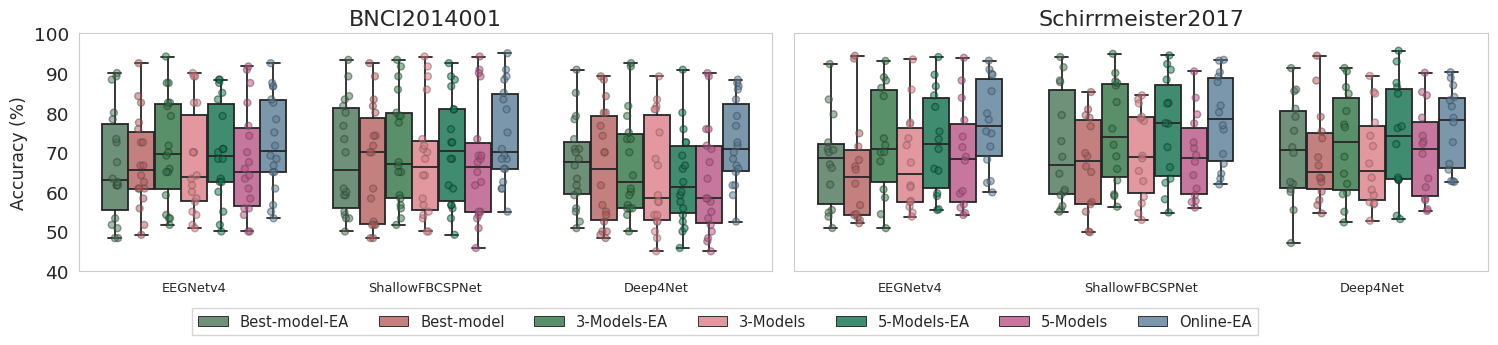

In [ ]:
models = {'EEGNetv4':'m1', 'ShallowFBCSPNet':'m2','Deep4Net':'m3'}
models_list = ['EEGNetv4','ShallowFBCSPNet','Deep4Net']
datasets = {'BNCI2014001':'d1', 'Schirrmeister2017':'d2'}
datasets_list = ['BNCI2014001', 'Schirrmeister2017']

df_merge_total = []
fig, ax = plt.subplots(1,2)

for i in range(len(datasets_list)):
  data = datasets_list[i]

  merge = []
  for model in models:
    m = models[model]

    # Best model
    best_EA = f"ensemble_{m}_best-{data}-alignment-exp_4-0-both_results.csv"
    best_no_EA = f"ensemble_{m}_best-{data}-no-alignment-exp_4-0-both_results.csv"
    resultsbest_EA = pd.read_csv(best_EA)
    resultsbest_EA['pipeline'] = f"{model}_EA"
    resultsbest_no_EA = pd.read_csv(best_no_EA)
    resultsbest_no_EA['pipeline'] = f"{model}_Without_EA"

    results_best = pd.concat([resultsbest_EA,resultsbest_no_EA])
    results_best = results_best[results_best['exp'] == 'online_1']

    # 3 models
    EA_3 = f"ensemble_{m}_hard_3-{data}-alignment-exp_4-0-both_results.csv"
    No_EA_3 = f"ensemble_{m}_hard_3-{data}-no-alignment-exp_4-0-both_results.csv"
    resultsEA_3 = pd.read_csv(EA_3)
    resultsEA_3['pipeline'] = f"{model}_EA"
    resultsNo_EA_3 = pd.read_csv(No_EA_3)
    resultsNo_EA_3['pipeline'] = f"{model}_Without_EA"

    results_3 = pd.concat([resultsEA_3,resultsNo_EA_3])
    results_3['exp'] = 'online_3'
    results_3 = results_3[results_3['exp'] == 'online_3']

    # 5 models
    EA_5 = f"ensemble_{m}_hard_5-{data}-alignment-exp_4-0-both_results.csv"
    No_EA_5 = f"ensemble_{m}_hard_5-{data}-no-alignment-exp_4-0-both_results.csv"
    resultsEA_5 = pd.read_csv(EA_5)
    resultsEA_5['pipeline'] = f"{model}_EA"
    resultsNo_EA_5 = pd.read_csv(No_EA_5)
    resultsNo_EA_5['pipeline'] = f"{model}_Without_EA"

    results_5 = pd.concat([resultsEA_5,resultsNo_EA_5])
    results_5 = results_5[results_5['exp'] == 'online_5']

    # Shared
    EA_shared = f"shared_{m}_final-{data}-alignment-exp_1-0-both_results.csv"
    No_EA_shared = f"shared_{m}_final-{data}-no-alignment-exp_1-0-both_results.csv"
    resultsEA_shared = pd.read_csv(EA_shared)
    resultsEA_shared['pipeline'] = f"{model}_EA"
    resultsNEA_shared = pd.read_csv(No_EA_shared)
    resultsNEA_shared['pipeline'] = f"{model}_Without_EA"

    results_shared = pd.concat([resultsEA_shared,resultsNEA_shared])
    results_shared = results_shared[results_shared['exp'] == '1run']
    results_shared.rename(columns = {'subject':'test'}, inplace = True)
    columns = ['Unnamed: 0', 'time', 'dataset', 'test', 'session', 'score', 'type', 'ft', 'n_samples', 'n_channels', 'exp', 'pipeline']
    results_shared = results_shared[columns]

    # Concat everything
    df_merge_data = pd.concat([results_best,results_3,results_5,results_shared])
    merge.append(df_merge_data)

  df_merge = pd.concat(merge)

  df_merge['EA'] = [output[-1] for output in df_merge['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]
  df_merge['model'] = [output[0] for output in df_merge['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]

  df_merge['score'] = df_merge['score']*100
  #df_exp2 = df_exp2[df_exp2["exp"] != "zero_shot"].reset_index(drop=True)
  # For each subj
  df_merge["aux"] = df_merge['exp'].astype(str) +"-"+ df_merge["EA"].astype(str)

  df_merge = df_merge[df_merge["aux"] != "1run-WithoutEA"].reset_index(drop=True)

  df_merge_total.append(df_merge)

  plt_ensemble_legend(df_merge,m,ax,i,data)

plt.legend([],[], frameon=False)

fig.tight_layout(pad=1.0)

#plt.tight_layout()
new_labels= ["Best-model-EA","Best-model","3-Models-EA","3-Models","5-Models-EA", "5-Models", "Online-EA"]

handles, previous_labels = ax[1].get_legend_handles_labels()
legend = ax[1].legend(handles=handles, labels=new_labels, loc='lower center', bbox_to_anchor=(-0.1, -0.3),
                  fancybox=False, shadow=False, ncol=7, fontsize=fontsize/1.5)

frame = legend.get_frame()
frame.set_facecolor('white')
fig.savefig(f"ensemble_all_v2.pdf", format='pdf', dpi=300, bbox_inches='tight')

df_merge_total = pd.concat(df_merge_total)

## Averages and Correlation

In [ ]:
models = {'EEGNet':'m1', 'ShallowNet':'m2','DeepNet':'m3'}
dataset = {'BNCI2014':'d1', 'Schirrmeister2017':'d2'}
alignment = df_exp2['EA'].unique()

for align in alignment:
    print(align)
    print()

    df_align = df_exp2[df_exp2['EA']==align]

    print('Overall')
    df_corr = []

    for s in df_align['subject'].unique():

        df_corr_subj = pd.DataFrame()

        df_target = df_align[df_align['test']==s].copy()
        df_source = df_align[df_align['subject']==s].copy()

        df_corr_subj['target']=df_target['score'].to_numpy()
        df_corr_subj['source']=df_source['score'].to_numpy()

        df_corr.append(df_corr_subj)

    df_corr = pd.concat(df_corr)
    print("Correlation")
    print(df_corr['source'].corr(df_corr['target']))
    print()

    for model in models:

      print(model)

      df_model = df_align[df_align['model']==model]

      df_corr_model = []

      for s in df_model['subject'].unique():

          df_corr_subj = pd.DataFrame()

          df_target = df_model[df_model['test']==s].copy()
          df_source = df_model[df_model['subject']==s].copy()

          df_corr_subj['source']=df_source['score'].to_numpy()
          df_corr_subj['target']=df_target['score'].to_numpy()

          df_corr_model.append(df_corr_subj)

      df_corr_model = pd.concat(df_corr_model)
      print("Correlation")
      print(df_corr_model['source'].corr(df_corr_model['target']))
      print()


    for data in dataset:

      print(data)

      df_data = df_align[df_align['dataset']==data]

      df_corr_data = []

      for s in df_data['subject'].unique():

          df_corr_subj = pd.DataFrame()

          df_target = df_data[df_data['test']==s].copy()
          df_source = df_data[df_data['subject']==s].copy()

          df_corr_subj['source']=df_source['score'].to_numpy()
          df_corr_subj['target']=df_target['score'].to_numpy()

          df_corr_data.append(df_corr_subj)

      df_corr_data = pd.concat(df_corr_data)
      print("Correlation")
      print(df_corr_data['source'].corr(df_corr_data['target']))
      print()


WithoutEA

Overall
Correlation
0.5199893908657848

EEGNet
Correlation
0.45971192445367204

ShallowNet
Correlation
0.5389810383505704

DeepNet
Correlation
0.5565660947615056

BNCI2014
Correlation
0.5645477645669583

Schirrmeister2017
Correlation
0.4705674052116917

EA

Overall
Correlation
0.6410248890868517

EEGNet
Correlation
0.5890371346535627

ShallowNet
Correlation
0.7012569365053319

DeepNet
Correlation
0.6242599239634326

BNCI2014
Correlation
0.6241364695224648

Schirrmeister2017
Correlation
0.6426136425541648



In [ ]:
models = {'EEGNetv4':'m1', 'Deep4Net':'m3', 'ShallowFBCSPNet':'m2'} # 'Deep4Net':'m3'
dataset = {'Schirrmeister2017':'d1', '001-2014':'d2'}

df_exp2 = df_merge_total.copy()
df_exp2['score'] = df_exp2['score']/100

# First, calculate average throught all models and datasets
print('All models')
print(' No EA')
print(df_exp2[df_exp2['EA'] == "WithoutEA"]['score'].mean())
print('std ', df_exp2[df_exp2['EA'] == "WithoutEA"]['score'].std() )
print(' EA')
print(df_exp2[df_exp2['EA'] == "EA"]['score'].mean())
print('std ', df_exp2[df_exp2['EA'] == "EA"]['score'].std() )
print("Improve")
print(df_exp2[df_exp2['EA'] == "EA"]['score'].mean()/df_exp2[df_exp2['EA'] == "WithoutEA"]['score'].mean()-1)

# Then
print()
print('Overall - Indivdual')
print('   No EA')
print('best: ',df_exp2[df_exp2['aux'] == "online_1-WithoutEA"]['score'].mean())
print('std ', df_exp2[df_exp2['aux'] == "online_1-WithoutEA"]['score'].std() )
print('3: ',df_exp2[df_exp2['aux'] == "online_3-WithoutEA"]['score'].mean())
print('std ', df_exp2[df_exp2['aux'] == "online_3-WithoutEA"]['score'].std() )
print('5: ',df_exp2[df_exp2['aux'] == "online_5-WithoutEA"]['score'].mean())
print('std ', df_exp2[df_exp2['aux'] == "online_5-WithoutEA"]['score'].std() )
print('   EA')
print('best: ',df_exp2[df_exp2['aux'] == "online_1-EA"]['score'].mean())
print('std ', df_exp2[df_exp2['aux'] == "online_1-EA"]['score'].std() )
print('3: ',df_exp2[df_exp2['aux'] == "online_3-EA"]['score'].mean())
print('std ', df_exp2[df_exp2['aux'] == "online_3-EA"]['score'].std() )
print('5: ',df_exp2[df_exp2['aux'] == "online_5-EA"]['score'].mean())
print('std ', df_exp2[df_exp2['aux'] == "online_5-EA"]['score'].std() )
print()

for model in models:

  df_model = df_exp2[df_exp2['model']==model]

  print(model)
  print('   No EA')
  print('best: ',df_model[df_model['aux'] == "online_1-WithoutEA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_1-WithoutEA"]['score'].std() )
  print('3: ',df_model[df_model['aux'] == "online_3-WithoutEA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_3-WithoutEA"]['score'].std() )
  print('5: ',df_model[df_model['aux'] == "online_5-WithoutEA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_5-WithoutEA"]['score'].std() )
  print('   EA')
  print('best: ',df_model[df_model['aux'] == "online_1-EA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_1-EA"]['score'].std() )
  print('3: ',df_model[df_model['aux'] == "online_3-EA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_3-EA"]['score'].std() )
  print('5: ',df_model[df_model['aux'] == "online_5-EA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_5-EA"]['score'].std() )

  print()

for data in dataset:
  df_model = df_exp2[df_exp2['dataset']==data]

  print(data)
  print('   No EA')
  print('best: ',df_model[df_model['aux'] == "online_1-WithoutEA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_1-WithoutEA"]['score'].std() )
  print('3: ',df_model[df_model['aux'] == "online_3-WithoutEA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_3-WithoutEA"]['score'].std() )
  print('5: ',df_model[df_model['aux'] == "online_5-WithoutEA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_5-WithoutEA"]['score'].std() )
  print('   EA')
  print('best: ',df_model[df_model['aux'] == "online_1-EA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_1-EA"]['score'].std() )
  print('3: ',df_model[df_model['aux'] == "online_3-EA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_3-EA"]['score'].std() )
  print('5: ',df_model[df_model['aux'] == "online_5-EA"]['score'].mean())
  print('std ', df_model[df_model['aux'] == "online_5-EA"]['score'].std() )

  print()

All models
 No EA
0.6734091291497513
std  0.129273621914751
 EA
0.7130619141616807
std  0.12898019383859483
Improve
0.0588836463532878

Overall - Indivdual
   No EA
best:  0.6707888014413245
std  0.12962745127075612
3:  0.674826638440464
std  0.12916691994671844
5:  0.6746119475674651
std  0.1303419824067502
   EA
best:  0.6854182604907216
std  0.12940159293346948
3:  0.7118767177466747
std  0.13284125215503237
5:  0.7068903274790667
std  0.1331846688570038

EEGNetv4
   No EA
best:  0.6672363833142906
std  0.12609812723722727
3:  0.6779214994888672
std  0.128020988192235
5:  0.6833077526972046
std  0.13130908419781195
   EA
best:  0.6722549638687711
std  0.12973066193974056
3:  0.7160250255758371
std  0.13335664154864965
5:  0.7129068866444603
std  0.12624141546045362

Deep4Net
   No EA
best:  0.6732582835765886
std  0.1334821301303651
3:  0.6605433508838476
std  0.132539416661079
5:  0.6586935042428886
std  0.13183250286249934
   EA
best:  0.6870152164712742
std  0.11955227522477803
3

#Statistics

In [ ]:
! pip install moabb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.0 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=aa572c7a166f428bf45731da8f01e06f525752814b6a45e7d395609bb814179c
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc933dc088e287ebfaac5aa9bdc6a38a9db193ce1f1
Successfully built pyriemann
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling 

In [ ]:
models = {'EEGNetv4':'m1', 'ShallowFBCSPNet':'m2','Deep4Net':'m3'}
models_list = ['EEGNetv4','ShallowFBCSPNet','Deep4Net']
datasets = {'BNCI2014001':'d1', 'Schirrmeister2017':'d2'}

df_merge_total = []

for i in range(len(models_list)):
  model = models_list[i]

  merge = []
  for data in datasets:
    m = models[model]

    # Best model
    best_EA = f"ensemble_{m}_best-{data}-alignment-exp_4-0-both_results.csv"
    best_no_EA = f"ensemble_{m}_best-{data}-no-alignment-exp_4-0-both_results.csv"
    resultsbest_EA = pd.read_csv(best_EA)
    resultsbest_EA['pipeline'] = f"{model}_EA"
    resultsbest_no_EA = pd.read_csv(best_no_EA)
    resultsbest_no_EA['pipeline'] = f"{model}_Without_EA"

    results_best = pd.concat([resultsbest_EA,resultsbest_no_EA])
    results_best = results_best[results_best['exp'] == 'online_1']

    # 3 models
    EA_3 = f"ensemble_{m}_hard_3-{data}-alignment-exp_4-0-both_results.csv"
    No_EA_3 = f"ensemble_{m}_hard_3-{data}-no-alignment-exp_4-0-both_results.csv"
    resultsEA_3 = pd.read_csv(EA_3)
    resultsEA_3['pipeline'] = f"{model}_EA"
    resultsNo_EA_3 = pd.read_csv(No_EA_3)
    resultsNo_EA_3['pipeline'] = f"{model}_Without_EA"

    results_3 = pd.concat([resultsEA_3,resultsNo_EA_3])
    results_3['exp'] = 'online_3'
    results_3 = results_3[results_3['exp'] == 'online_3']

    # 5 models
    EA_5 = f"ensemble_{m}_hard_5-{data}-alignment-exp_4-0-both_results.csv"
    No_EA_5 = f"ensemble_{m}_hard_5-{data}-no-alignment-exp_4-0-both_results.csv"
    resultsEA_5 = pd.read_csv(EA_5)
    resultsEA_5['pipeline'] = f"{model}_EA"
    resultsNo_EA_5 = pd.read_csv(No_EA_5)
    resultsNo_EA_5['pipeline'] = f"{model}_Without_EA"

    results_5 = pd.concat([resultsEA_5,resultsNo_EA_5])
    results_5 = results_5[results_5['exp'] == 'online_5']

    # Shared
    EA_shared = f"shared_{m}_final-{data}-alignment-exp_1-0-both_results.csv"
    No_EA_shared = f"shared_{m}_final-{data}-no-alignment-exp_1-0-both_results.csv"
    resultsEA_shared = pd.read_csv(EA_shared)
    resultsEA_shared['pipeline'] = f"{model}_EA"
    resultsNEA_shared = pd.read_csv(No_EA_shared)
    resultsNEA_shared['pipeline'] = f"{model}_Without_EA"

    results_shared = pd.concat([resultsEA_shared,resultsNEA_shared])
    results_shared = results_shared[results_shared['exp'] != 'zero_shot']
    #results_shared = results_shared[results_shared['exp'] != 'fine-tuning']
    results_shared.rename(columns = {'subject':'test'}, inplace = True)
    columns = ['Unnamed: 0', 'time', 'dataset', 'test', 'session', 'score', 'type', 'ft', 'n_samples', 'n_channels', 'exp', 'pipeline']
    results_shared = results_shared[columns]

    # Concat everything
    df_merge_data = pd.concat([results_best,results_3,results_5,results_shared])
    merge.append(df_merge_data)

  df_merge = pd.concat(merge)

  df_merge['EA'] = [output[-1] for output in df_merge['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]
  df_merge['model'] = [output[0] for output in df_merge['pipeline'].str.replace("Without_EA","WithoutEA").str.split("_")]

  df_merge['score'] = df_merge['score']*100
  #df_exp2 = df_exp2[df_exp2["exp"] != "zero_shot"].reset_index(drop=True)
  # For each subj
  df_merge["aux"] = df_merge['exp'].astype(str) +"-"+ df_merge["EA"].astype(str)

  df_merge = df_merge[df_merge["aux"] != "1run-WithoutEA"].reset_index(drop=True)
  df_merge = df_merge[df_merge["aux"] != "shared-EA"].reset_index(drop=True)

  df_merge_total.append(df_merge)

df_merge_total = pd.concat(df_merge_total)

In [ ]:
df_merge_total.loc[df_merge_total['dataset']=='001-2014', 'dataset'] = 'BNCI2014'
df_merge_total.loc[df_merge_total['model']=='Deep4Net', 'model'] = 'DeepNet'
df_merge_total.loc[df_merge_total['model']=='ShallowFBCSPNet', 'model'] = 'ShallowNet'
df_merge_total.loc[df_merge_total['model']=='EEGNetv4', 'model'] = 'EEGNet'

In [ ]:
# Creating auxiliar dataframe
df = df_merge_total.copy()
df = df.drop(columns=['pipeline'])
df = df.rename(columns={'aux':'pipeline', 'test':'subject'})

## Test just ensemble models

In [ ]:
# First, test the ensemble models with and without EA
df_ensemble = df.copy()

df_ensemble = df_ensemble[df_ensemble['exp'] != 'fine-tuning']

df_ensemble = df_ensemble[df_ensemble["pipeline"] != "1run-EA"].reset_index(drop=True)
df_ensemble = df_ensemble[df_ensemble["pipeline"] != "shared-WithoutEA"].reset_index(drop=True)

df_ensemble.loc[df_ensemble['pipeline']=='online_1-EA', 'pipeline'] = 'best-EA'
df_ensemble.loc[df_ensemble['pipeline']=='online_1-WithoutEA', 'pipeline'] = 'best'
df_ensemble.loc[df_ensemble['pipeline']=='online_3-EA', 'pipeline'] = '3-models-EA'
df_ensemble.loc[df_ensemble['pipeline']=='online_3-WithoutEA', 'pipeline'] = '3-models'
df_ensemble.loc[df_ensemble['pipeline']=='online_5-EA', 'pipeline'] = '5-models-EA'
df_ensemble.loc[df_ensemble['pipeline']=='online_5-WithoutEA', 'pipeline'] = '5-models'


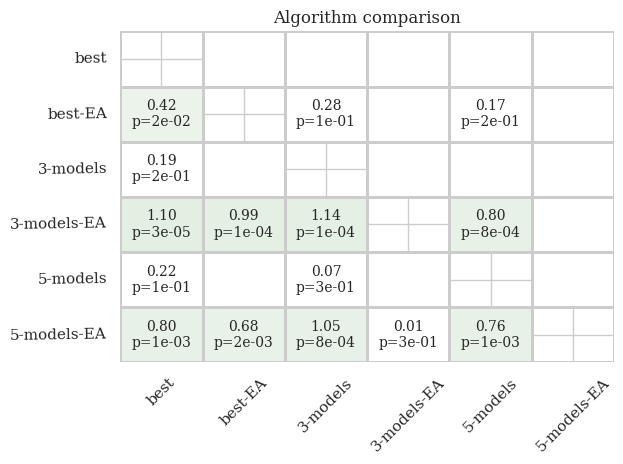

In [ ]:
from moabb.analysis.meta_analysis import compute_dataset_statistics, find_significant_differences
from moabb.analysis.plotting import summary_plot

stats = compute_dataset_statistics(df_ensemble)
P, T = find_significant_differences(stats)

P = P.reindex(["best", "best-EA", "3-models", "3-models-EA", "5-models", "5-models-EA"])
P = P[["best", "best-EA", "3-models", "3-models-EA", "5-models", "5-models-EA"]]

T = T.reindex(["best", "best-EA", "3-models", "3-models-EA", "5-models", "5-models-EA"])
T = T[["best", "best-EA", "3-models", "3-models-EA", "5-models", "5-models-EA"]]

fig = summary_plot(P, T)
plt.show()
fig.savefig(f"stat_test_ensemble.pdf", format='pdf', dpi=300, bbox_inches='tight')



## Test ensemble with shared

In [ ]:
df['pipeline'].unique()

array(['online_1-EA', 'online_1-WithoutEA', 'online_3-EA',
       'online_3-WithoutEA', 'online_5-EA', 'online_5-WithoutEA',
       '1run-EA', 'fine-tuning-EA', 'shared-WithoutEA',
       'fine-tuning-WithoutEA'], dtype=object)

In [ ]:
# First, test the ensemble models with and without EA
df_ensemble = df.copy()

df_ensemble = df_ensemble[df_ensemble["pipeline"] != "fine-tuning-EA"].reset_index(drop=True)
# df_ensemble = df_ensemble[df_ensemble["pipeline"] != "shared-WithoutEA"].reset_index(drop=True)
df_ensemble = df_ensemble[df_ensemble["pipeline"] != "online_1-EA"].reset_index(drop=True)
df_ensemble = df_ensemble[df_ensemble["pipeline"] != "online_1-WithoutEA"].reset_index(drop=True)
df_ensemble = df_ensemble[df_ensemble["pipeline"] != "online_5-EA"].reset_index(drop=True)
df_ensemble = df_ensemble[df_ensemble["pipeline"] != "online_5-WithoutEA"].reset_index(drop=True)

df_ensemble.loc[df_ensemble['pipeline']=='1run-EA', 'pipeline'] = 'online-EA'
df_ensemble.loc[df_ensemble['pipeline']=='fine-tuning-WithoutEA', 'pipeline'] = 'fine-tuning-NA'
df_ensemble.loc[df_ensemble['pipeline']=='shared-WithoutEA', 'pipeline'] = 'non-aligned'
df_ensemble.loc[df_ensemble['pipeline']=='online_3-EA', 'pipeline'] = '3-models-EA'
df_ensemble.loc[df_ensemble['pipeline']=='online_3-WithoutEA', 'pipeline'] = '3-models'



In [ ]:
df_ensemble['pipeline'].unique()

array(['online_1-EA', 'online_1-WithoutEA', 'online_3-EA',
       'online_3-WithoutEA', 'online_5-EA', 'online_5-WithoutEA',
       '1run-EA', 'shared-WithoutEA', 'fine-tuning-WithoutEA'],
      dtype=object)

NaN


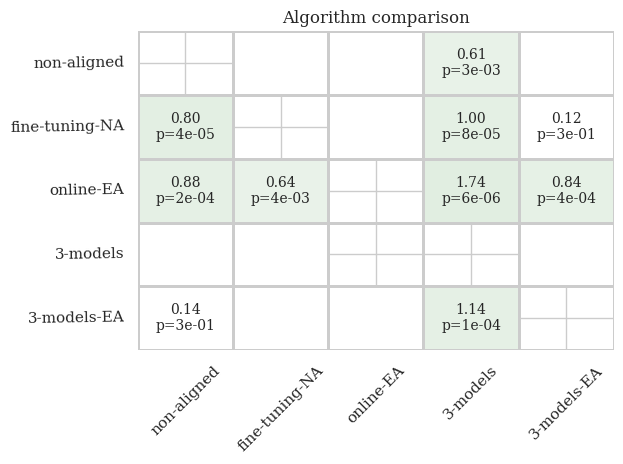

In [ ]:
from moabb.analysis.meta_analysis import compute_dataset_statistics, find_significant_differences
from moabb.analysis.plotting import summary_plot

stats = compute_dataset_statistics(df_ensemble)
P, T = find_significant_differences(stats)

P = P.reindex(["non-aligned", "fine-tuning-NA", "online-EA", "3-models", "3-models-EA"])
P = P[["non-aligned", "fine-tuning-NA", "online-EA", "3-models", "3-models-EA"]]

T = T.reindex(["non-aligned", "fine-tuning-NA", "online-EA", "3-models", "3-models-EA"])
T = T[["non-aligned", "fine-tuning-NA", "online-EA", "3-models", "3-models-EA"]]

fig = summary_plot(P, T)
plt.show()
fig.savefig(f"stat_test_ensemble_shared.pdf", format='pdf', dpi=300, bbox_inches='tight')

